In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100

pd.options.display.max_rows = 200

In [2]:
plant_1_generation = pd.read_csv("dataset/Plant_1_Generation_Data.csv")
plant_1_weaSensor = pd.read_csv("dataset/Plant_1_Weather_Sensor_Data.csv")
plant_2_generation = pd.read_csv("dataset/Plant_2_Generation_Data.csv")
plant_2_weaSensor = pd.read_csv("dataset/Plant_2_Weather_Sensor_Data.csv")

In [3]:
plant_1_generation.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [4]:
plant_1_weaSensor

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [5]:
plant_2_generation

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [6]:
plant_2_weaSensor

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


To keep in mind dataset creator on the collection process: 

**Power generation and sensor data gathered at 15 minutes intervals over a 34 day period. Generation data collected at inverter level, while the sensor data is at the plant level.**

## Checking generation on a single plant


### Generation evolution

<Axes: xlabel='DATE_TIME'>

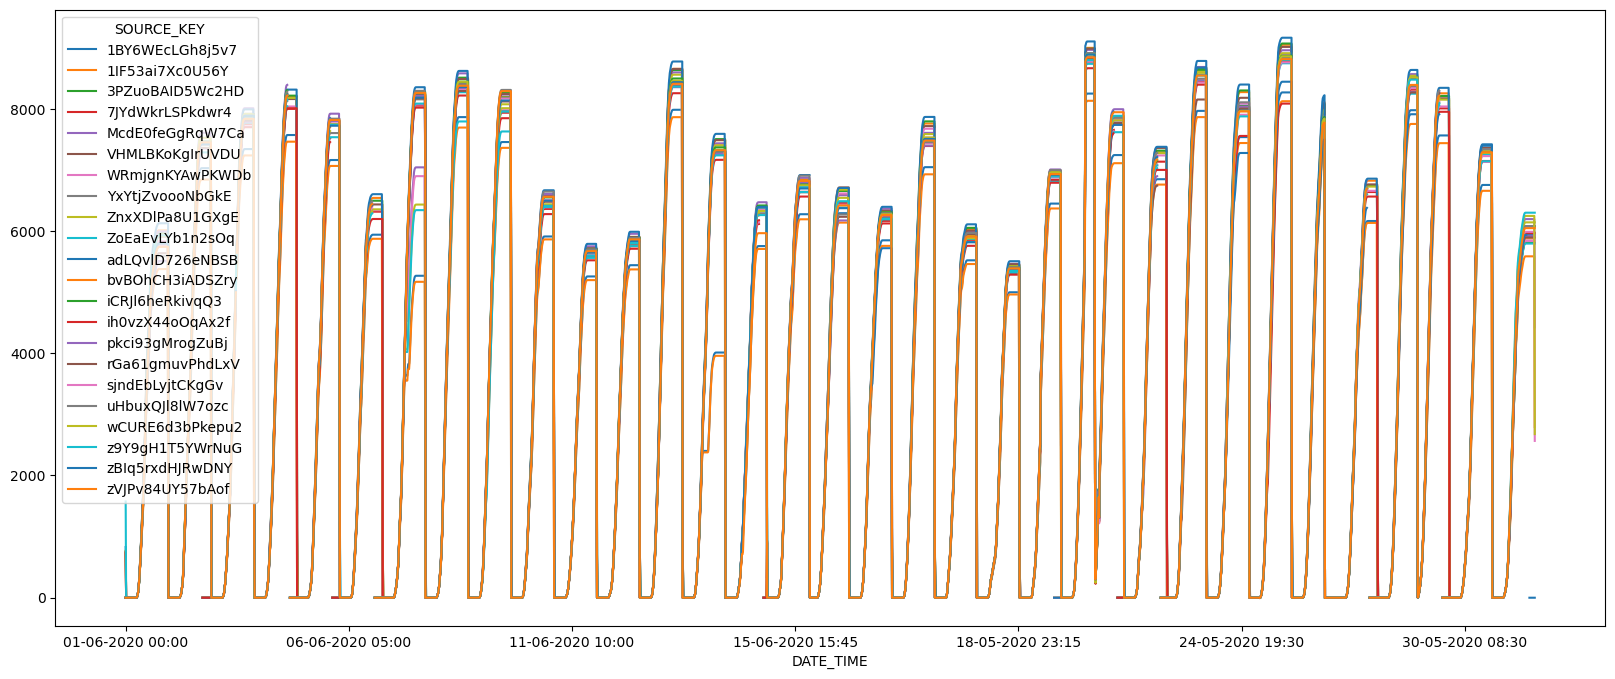

In [8]:
plant_1_generation.pivot_table(index='DATE_TIME', columns='SOURCE_KEY', values="DAILY_YIELD").plot()


<Axes: xlabel='DATE'>

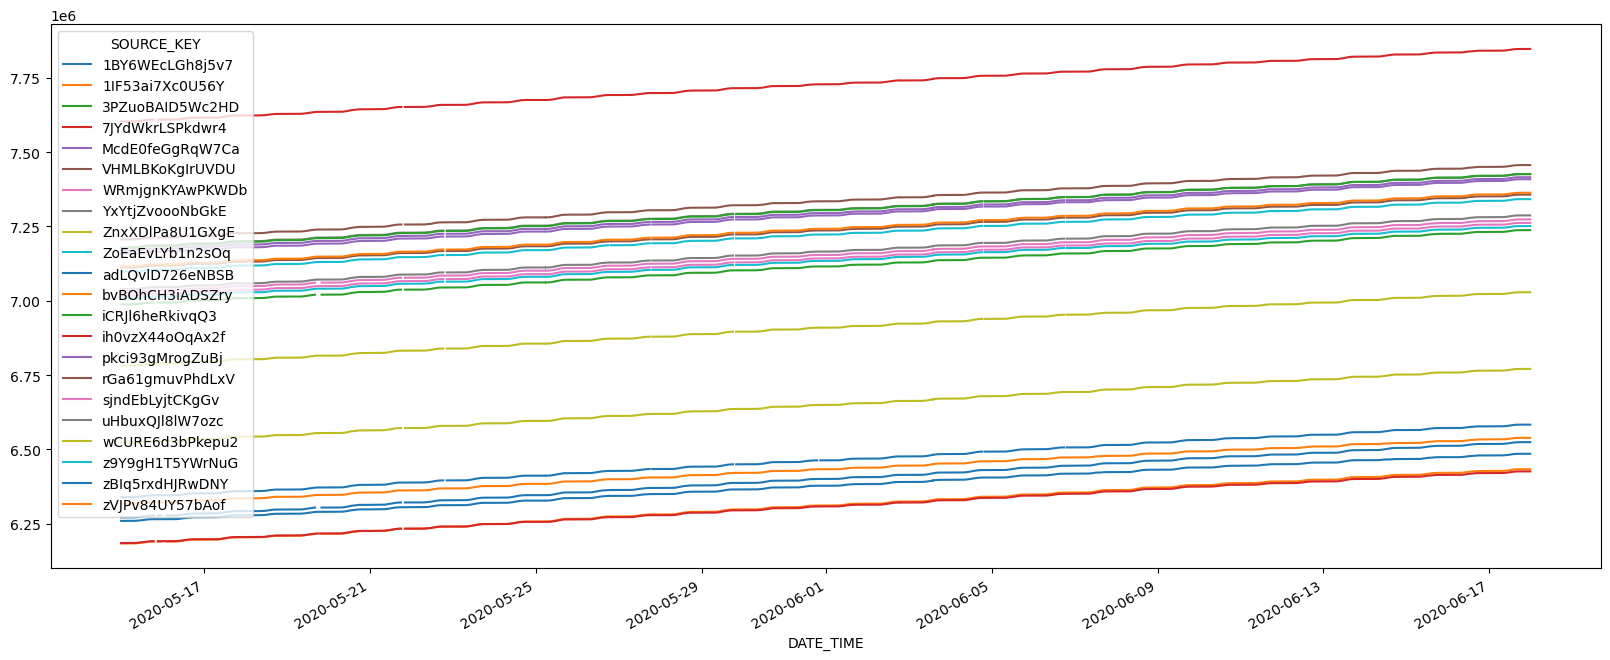

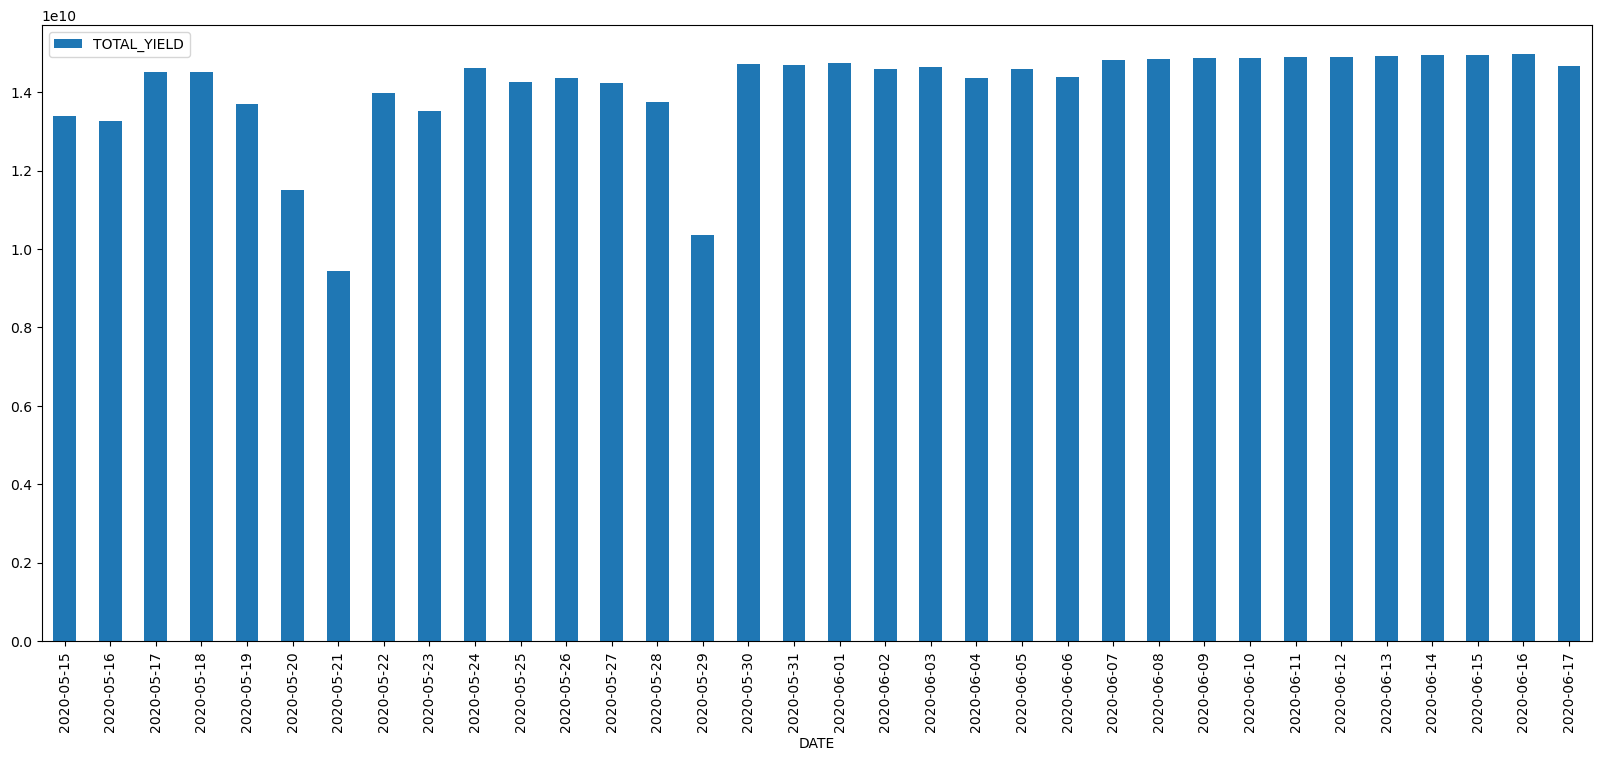

In [118]:
plant_1_generation.pivot_table(index='DATE_TIME', columns='SOURCE_KEY', values="TOTAL_YIELD").plot()
plant_1_generation['DATE'] = plant_1_generation['DATE_TIME'].dt.date
plant_1_generation[['DATE', 'TOTAL_YIELD']].groupby('DATE').sum().plot.bar()


We can see that a few arrays are producing less than others, and there was a lower production on few days (like the 21-05-2020)

### Checking on a 24 basis 

Now that we have a better vision on a macro size, time to dig onto 24 hours basis

#### AC/DC power generation over a day

<Axes: xlabel='TIME'>

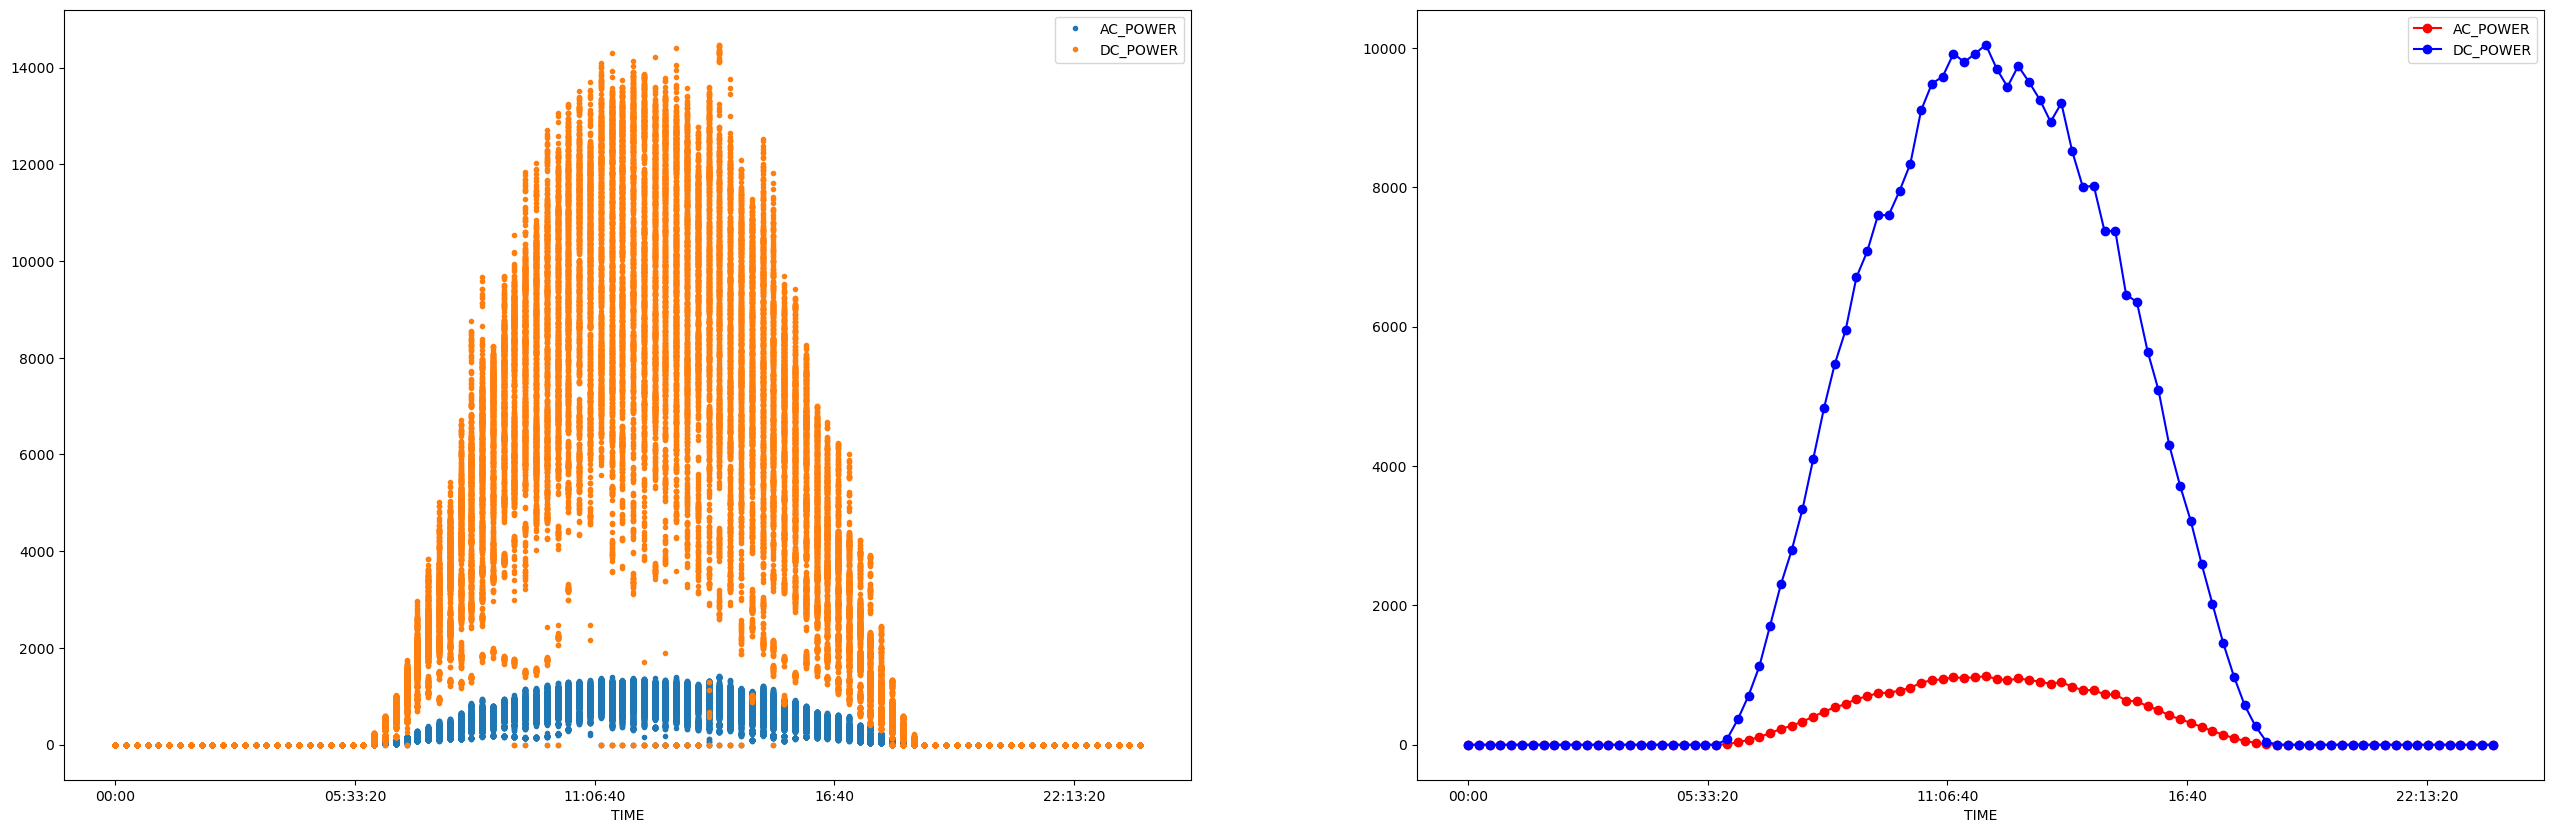

In [104]:
p1_g_24 = plant_1_generation
p1_g_24['DATE_TIME'] = pd.to_datetime(p1_g_time['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
p1_g_24['TIME'] = p1_g_time['DATE_TIME'].dt.time

p1_g_24_meanLine = p1_g_24.groupby("TIME")[['AC_POWER', 'DC_POWER']].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2)
p1_g_24.plot(x='TIME', y=['AC_POWER','DC_POWER'], style='.', ax=axes[0], figsize=(32,10))
p1_g_24_meanLine.plot(x='TIME', y=['AC_POWER', 'DC_POWER'], marker='o', ax=axes[1], color=['red', 'blue'])


Even though we have sporadics data and some few outliers dots, the overall capacity look good, but with previous graphs, we can start to make an hypothesis on some arrays not working properly.
Let's have a look at the sensors data before digging into this.

## Sensors for plant 1   